In [1]:
#Imports
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from tslearn.utils import *
from tslearn.clustering import TimeSeriesKMeans
from contextlib import redirect_stdout

In [10]:
seed = 1
np.random.seed(seed)

#Get Companies
#companyStockFile = sys.argv[1]
#companiesCSV = pd.read_csv(companyStockFile,index_col = 0)

companiesCSV = pd.read_csv('./DataFrames/Stock data.csv',index_col = 0)

#display(companiesCSV)

In [9]:
#Split companies into their own data structures
#Format each company to a time series for use with tslearn
companyNames = []
companyStockPrices = []
formatted_time_series = []
numCompanies = len(companiesCSV.columns)-3

for company in range(0,numCompanies):
    companyNames.append(companiesCSV.columns.values[company+3])
    companyStockPrices.append(companiesCSV.filter(items=[companyNames[company]]))
    initialStockPrice = companyStockPrices[company].iloc[0,0]
    for stockPrice in range(0,len(companyStockPrices[company])):
        companyStockPrices[company].iloc[stockPrice,0] -= initialStockPrice
    companyStockPrices[company] = companyStockPrices[company].T
    companyStockPrices[company] = companyStockPrices[company].to_numpy()
    formatted_time_series.append(to_time_series(companyStockPrices[company]))

In [58]:
numClusters = 4
seed = 5
np.random.seed(seed)
formatted_dataset = to_time_series_dataset(formatted_time_series)
sz = formatted_dataset.shape[1]
km = TimeSeriesKMeans(n_clusters=numClusters,metric="euclidean",
                                  random_state=seed,n_init=3)   
clusterPredictions = km.fit_predict(formatted_dataset)

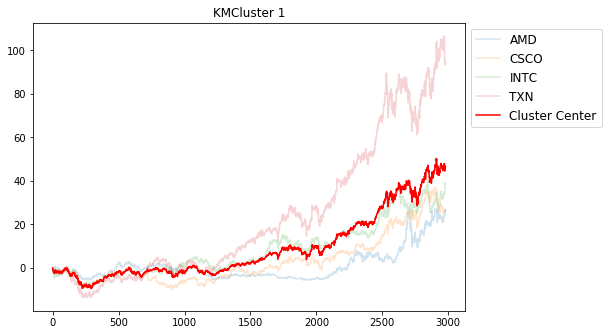

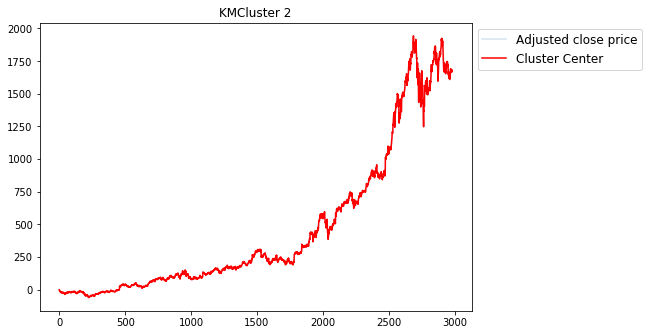

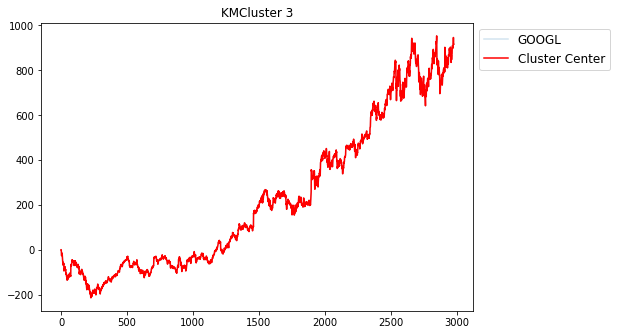

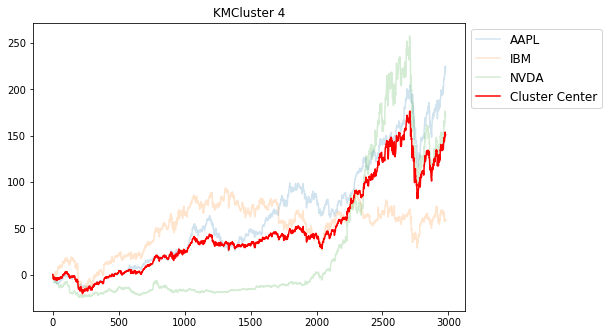

In [59]:
for cluster in range(numClusters):
    figName = "Cluster" + str(cluster) + '.jpg'
    fig = plt.figure()#figsize=(20,10))
    #plt.tight_layout()
    ax = fig.add_axes([0,0,1,1])
    for j in range(0,len(formatted_dataset)):
        if(clusterPredictions[j] == cluster):
            xx = formatted_dataset[j]
            ax.plot(xx.ravel(), alpha=.2, label=companyNames[j]) #"k-"
    ax.plot(km.cluster_centers_[cluster].ravel(), "r-", label='Cluster Center') 
    ax.set_title("KMCluster " + str(cluster+1))
    lgd = ax.legend(bbox_to_anchor=(1, 1),fontsize = 'large')
    fig.savefig(figName,bbox_inches="tight")